In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline
import cifar10

In [2]:
from utils import load_cifar10_data
x_train, y_train, x_validate, y_validate, x_test, y_test = load_cifar10_data()

Data has apparently already been downloaded and unpacked.
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5
Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch


In [3]:
import network, train, utils
from layers import ReluLayer, BinaryFullyConnectedLayer, \
    BinaryConvolutionLayer, BatchNormLayer, MaxPoolingLayer

In [4]:
nn = network.NeuralNetwork(in_size=[None, 32, 32, 3], n_out_classes=10, 
                           loss_func=utils.smooth_hinge_loss)
nn.reset_graph()

# Hidden Conv-1
nn.add_layer(BinaryConvolutionLayer(
    out_dim=128, filter_size=3))
nn.add_layer(BatchNormLayer(axes=[0, 1, 2]))
nn.add_layer(ReluLayer())

# Hidden Conv-2
nn.add_layer(BinaryConvolutionLayer(
    out_dim=128, filter_size=3))
nn.add_layer(MaxPoolingLayer())
nn.add_layer(BatchNormLayer(axes=[0, 1, 2]))
nn.add_layer(ReluLayer())

# Hidden Conv-3
nn.add_layer(BinaryConvolutionLayer(
    out_dim=256, filter_size=3))
nn.add_layer(BatchNormLayer(axes=[0, 1, 2]))
nn.add_layer(ReluLayer())

# Hidden Conv-4
nn.add_layer(BinaryConvolutionLayer(
    out_dim=256, filter_size=3))
nn.add_layer(MaxPoolingLayer())
nn.add_layer(BatchNormLayer(axes=[0, 1, 2]))
nn.add_layer(ReluLayer())

# Hidden Conv-5
nn.add_layer(BinaryConvolutionLayer(
    out_dim=512, filter_size=3))
nn.add_layer(BatchNormLayer(axes=[0, 1, 2]))
nn.add_layer(ReluLayer())

# Hidden Conv-6
nn.add_layer(BinaryConvolutionLayer(
    out_dim=512, filter_size=3))
nn.add_layer(MaxPoolingLayer())
nn.add_layer(BatchNormLayer(axes=[0, 1, 2]))
nn.add_layer(ReluLayer())

# Hidden Fc-7
nn.add_layer(BinaryFullyConnectedLayer(
    out_dim=1024))
nn.add_layer(BatchNormLayer(axes=[0]))
nn.add_layer(ReluLayer())

# Hidden Fc-8
nn.add_layer(BinaryFullyConnectedLayer(
    out_dim=1024))
nn.add_layer(BatchNormLayer(axes=[0]))
nn.add_layer(ReluLayer())

# Hidden Fc-9
nn.add_layer(BinaryFullyConnectedLayer(out_dim=10))
nn.add_layer(BatchNormLayer(axes=[0]))

nn.finalize()

In [5]:
data_train = (x_train, y_train)
opt = train.Trainer(nn, data_train)

In [6]:
# Hyper-parameters
opt.set_rho(0.5)
opt.set_ema_rates(0.999)

In [ ]:
losses_and_accs_train = []
losses_and_accs_valid = []
losses_and_accs_test = []

n_epochs = 500

for t in range(n_epochs):        
    print('Epoch: ', t)

    opt.train_epoch(batch_size=100, ema_decay=0.98, n_output=10, verbose=True)
    losses_and_accs_train.append(
        opt.loss_and_accuracy((x_train, y_train), max_batch=400, inference=True))
    losses_and_accs_test.append(
        opt.loss_and_accuracy((x_test, y_test), max_batch=400, inference=True))
    losses_and_accs_valid.append(
        opt.loss_and_accuracy((x_validate, y_validate), max_batch=400, inference=True))
    
    print('Train loss/acc: ', losses_and_accs_train[-1],
          'Test loss/acc: ', losses_and_accs_test[-1])
    
losses_and_accs_train = np.asarray(losses_and_accs_train)
losses_and_accs_valid = np.asarray(losses_and_accs_valid)
losses_and_accs_test = np.asarray(losses_and_accs_test)

Epoch:  0
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.99900001, 0.99900001, 0.99900001, 0.99900001, 0.99900001, 0.99900001, 0.99900001, 0.99900001, 0.99900001]
rho:
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
Iter: 0 of 450 || Estimated train loss/acc: 1.818457, 0.27
Iter: 45 of 450 || Estimated train loss/acc: 1.565276, 0.08
Iter: 90 of 450 || Estimated train loss/acc: 1.530898, 0.13
Iter: 135 of 450 || Estimated train loss/acc: 1.415289, 0.12
Iter: 180 of 450 || Estimated train loss/acc: 1.310719, 0.15
Iter: 225 of 450 || Estimated train loss/acc: 1.250380, 0.18
Iter: 270 of 450 || Estimated train loss/acc: 1.159019, 0.22
Iter: 315 of 450 || Estimated train loss/acc: 1.274668, 0.18
Iter: 360 of 450 || Estimated train loss/acc: 1.233475, 0.16
Iter: 405 of 450 || Estimated train loss/acc: 1.122713, 0.13
Train loss/acc:  (1.1185676113764444, 0.19824444466167027) Test loss/acc:  (1.1222854328155518, 0.1994999998807907)
Epoch:  1
========= Begin epoch =========
batch_

Iter: 270 of 450 || Estimated train loss/acc: 0.051172, 0.95
Iter: 315 of 450 || Estimated train loss/acc: 0.039138, 0.99
Iter: 360 of 450 || Estimated train loss/acc: 0.081427, 0.89
Iter: 405 of 450 || Estimated train loss/acc: 0.082112, 0.86
Train loss/acc:  (0.13439599474271138, 0.77431110991371999) Test loss/acc:  (0.17235824823379517, 0.71359999656677242)
Epoch:  9
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.99916619, 0.99916619, 0.99916619, 0.99916619, 0.99916619, 0.99916619, 0.99916619, 0.99916619, 0.99916619]
rho:
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
Iter: 0 of 450 || Estimated train loss/acc: 0.068084, 0.91
Iter: 45 of 450 || Estimated train loss/acc: 0.039982, 0.96
Iter: 90 of 450 || Estimated train loss/acc: 0.057007, 0.93
Iter: 135 of 450 || Estimated train loss/acc: 0.059276, 0.92
Iter: 180 of 450 || Estimated train loss/acc: 0.050742, 0.93
Iter: 225 of 450 || Estimated train loss/acc: 0.067744, 0.88
Iter: 270 of 450 || Estimated train loss/acc:

Iter: 0 of 450 || Estimated train loss/acc: 0.036093, 0.96
Iter: 45 of 450 || Estimated train loss/acc: 0.015237, 1.00
Iter: 90 of 450 || Estimated train loss/acc: 0.035343, 0.96
Iter: 135 of 450 || Estimated train loss/acc: 0.013802, 0.99
Iter: 180 of 450 || Estimated train loss/acc: 0.014261, 1.00
Iter: 225 of 450 || Estimated train loss/acc: 0.036864, 0.95
Iter: 270 of 450 || Estimated train loss/acc: 0.013270, 0.99
Iter: 315 of 450 || Estimated train loss/acc: 0.010993, 1.00
Iter: 360 of 450 || Estimated train loss/acc: 0.050563, 0.95
Iter: 405 of 450 || Estimated train loss/acc: 0.028884, 0.96
Train loss/acc:  (0.075761164658599431, 0.88044444243113196) Test loss/acc:  (0.15148371040821076, 0.75919999837875363)
Epoch:  18
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.99930483, 0.99930483, 0.99930483, 0.99930483, 0.99930483, 0.99930483, 0.99930483, 0.99930483, 0.99930483]
rho:
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
Iter: 0 of 450 || Estimated train loss/acc:

Iter: 405 of 450 || Estimated train loss/acc: 0.013558, 0.99
Train loss/acc:  (0.066336155467563204, 0.89339999251895486) Test loss/acc:  (0.15548272132873536, 0.75799999952316288)
Epoch:  26
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.9994086, 0.9994086, 0.9994086, 0.9994086, 0.9994086, 0.9994086, 0.9994086, 0.9994086, 0.9994086]
rho:
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
Iter: 0 of 450 || Estimated train loss/acc: 0.013692, 0.98
Iter: 45 of 450 || Estimated train loss/acc: 0.030045, 0.97
Iter: 90 of 450 || Estimated train loss/acc: 0.002430, 1.00
Iter: 135 of 450 || Estimated train loss/acc: 0.008744, 1.00
Iter: 180 of 450 || Estimated train loss/acc: 0.002983, 1.00
Iter: 225 of 450 || Estimated train loss/acc: 0.017184, 0.99
Iter: 270 of 450 || Estimated train loss/acc: 0.004569, 1.00
Iter: 315 of 450 || Estimated train loss/acc: 0.016420, 0.99
Iter: 360 of 450 || Estimated train loss/acc: 0.002267, 1.00
Iter: 405 of 450 || Estimated train loss/acc: 0.0098

Iter: 135 of 450 || Estimated train loss/acc: 0.004994, 1.00
Iter: 180 of 450 || Estimated train loss/acc: 0.011477, 1.00
Iter: 225 of 450 || Estimated train loss/acc: 0.014427, 0.99
Iter: 270 of 450 || Estimated train loss/acc: 0.004168, 1.00
Iter: 315 of 450 || Estimated train loss/acc: 0.003703, 1.00
Iter: 360 of 450 || Estimated train loss/acc: 0.017282, 0.98
Iter: 405 of 450 || Estimated train loss/acc: 0.006344, 1.00
Train loss/acc:  (0.047056974702411228, 0.93117778168784249) Test loss/acc:  (0.15669322669506072, 0.77859999895095822)
Epoch:  35
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.99950689, 0.99950689, 0.99950689, 0.99950689, 0.99950689, 0.99950689, 0.99950689, 0.99950689, 0.99950689]
rho:
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
Iter: 0 of 450 || Estimated train loss/acc: 0.003549, 1.00
Iter: 45 of 450 || Estimated train loss/acc: 0.002741, 1.00
Iter: 90 of 450 || Estimated train loss/acc: 0.017374, 0.98
Iter: 135 of 450 || Estimated train loss/ac

========= Begin epoch =========
batch_size = 100
EMA rates:
[0.99958056, 0.99958056, 0.99958056, 0.99958056, 0.99958056, 0.99958056, 0.99958056, 0.99958056, 0.99958056]
rho:
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
Iter: 0 of 450 || Estimated train loss/acc: 0.001344, 1.00
Iter: 45 of 450 || Estimated train loss/acc: 0.014215, 0.98
Iter: 90 of 450 || Estimated train loss/acc: 0.008375, 1.00
Iter: 135 of 450 || Estimated train loss/acc: 0.005185, 1.00
Iter: 180 of 450 || Estimated train loss/acc: 0.001534, 1.00
Iter: 225 of 450 || Estimated train loss/acc: 0.010794, 0.99
Iter: 270 of 450 || Estimated train loss/acc: 0.018244, 0.98
Iter: 315 of 450 || Estimated train loss/acc: 0.019843, 0.97
Iter: 360 of 450 || Estimated train loss/acc: 0.003739, 1.00
Iter: 405 of 450 || Estimated train loss/acc: 0.004734, 1.00
Train loss/acc:  (0.024559243768453597, 0.96626666545867923) Test loss/acc:  (0.13643630087375641, 0.80300000667572025)
Epoch:  44
========= Begin epoch =========
batch_size 

Iter: 270 of 450 || Estimated train loss/acc: 0.008826, 1.00
Iter: 315 of 450 || Estimated train loss/acc: 0.009529, 1.00
Iter: 360 of 450 || Estimated train loss/acc: 0.002399, 1.00
Iter: 405 of 450 || Estimated train loss/acc: 0.002387, 1.00
Train loss/acc:  (0.033976372480392453, 0.95282221025890779) Test loss/acc:  (0.14960452735424043, 0.79380000114440918)
Epoch:  52
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.9996503, 0.9996503, 0.9996503, 0.9996503, 0.9996503, 0.9996503, 0.9996503, 0.9996503, 0.9996503]
rho:
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
Iter: 0 of 450 || Estimated train loss/acc: 0.000422, 1.00
Iter: 45 of 450 || Estimated train loss/acc: 0.003159, 1.00
Iter: 90 of 450 || Estimated train loss/acc: 0.002257, 1.00
Iter: 135 of 450 || Estimated train loss/acc: 0.004842, 1.00
Iter: 180 of 450 || Estimated train loss/acc: 0.005422, 1.00
Iter: 225 of 450 || Estimated train loss/acc: 0.003781, 1.00
Iter: 270 of 450 || Estimated train loss/acc: 0.0075

Iter: 0 of 450 || Estimated train loss/acc: 0.000373, 1.00
Iter: 45 of 450 || Estimated train loss/acc: 0.006256, 1.00
Iter: 90 of 450 || Estimated train loss/acc: 0.001693, 1.00
Iter: 135 of 450 || Estimated train loss/acc: 0.000037, 1.00
Iter: 180 of 450 || Estimated train loss/acc: 0.006548, 0.99
Iter: 225 of 450 || Estimated train loss/acc: 0.012431, 0.99
Iter: 270 of 450 || Estimated train loss/acc: 0.005109, 1.00
Iter: 315 of 450 || Estimated train loss/acc: 0.018476, 0.98
Iter: 360 of 450 || Estimated train loss/acc: 0.015300, 0.99
Iter: 405 of 450 || Estimated train loss/acc: 0.001548, 1.00
Train loss/acc:  (0.020987736756602923, 0.97513334618674385) Test loss/acc:  (0.14719699829816818, 0.80560000419616695)
Epoch:  61
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.99970841, 0.99970841, 0.99970841, 0.99970841, 0.99970841, 0.99970841, 0.99970841, 0.99970841, 0.99970841]
rho:
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
Iter: 0 of 450 || Estimated train loss/acc:

Iter: 405 of 450 || Estimated train loss/acc: 0.015049, 0.99
Train loss/acc:  (0.026806143911348449, 0.96288888427946306) Test loss/acc:  (0.15966088354587554, 0.7907000064849854)
Epoch:  69
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.99975193, 0.99975193, 0.99975193, 0.99975193, 0.99975193, 0.99975193, 0.99975193, 0.99975193, 0.99975193]
rho:
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
Iter: 0 of 450 || Estimated train loss/acc: 0.002175, 1.00
Iter: 45 of 450 || Estimated train loss/acc: 0.008701, 1.00
Iter: 90 of 450 || Estimated train loss/acc: 0.005069, 1.00
Iter: 135 of 450 || Estimated train loss/acc: 0.001342, 1.00
Iter: 180 of 450 || Estimated train loss/acc: 0.000916, 1.00
Iter: 225 of 450 || Estimated train loss/acc: 0.001997, 1.00
Iter: 270 of 450 || Estimated train loss/acc: 0.000570, 1.00
Iter: 315 of 450 || Estimated train loss/acc: 0.010530, 0.99
Iter: 360 of 450 || Estimated train loss/acc: 0.003247, 1.00
Iter: 405 of 450 || Estimated train loss/acc

Iter: 135 of 450 || Estimated train loss/acc: 0.007163, 1.00
Iter: 180 of 450 || Estimated train loss/acc: 0.004321, 1.00
Iter: 225 of 450 || Estimated train loss/acc: 0.001208, 1.00
Iter: 270 of 450 || Estimated train loss/acc: 0.000533, 1.00
Iter: 315 of 450 || Estimated train loss/acc: 0.005809, 1.00
Iter: 360 of 450 || Estimated train loss/acc: 0.000097, 1.00
Iter: 405 of 450 || Estimated train loss/acc: 0.000219, 1.00
Train loss/acc:  (0.014448052330149544, 0.9818444612291124) Test loss/acc:  (0.15673400074243546, 0.81059999942779537)
Epoch:  78
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.99979317, 0.99979317, 0.99979317, 0.99979317, 0.99979317, 0.99979317, 0.99979317, 0.99979317, 0.99979317]
rho:
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
Iter: 0 of 450 || Estimated train loss/acc: 0.000697, 1.00
Iter: 45 of 450 || Estimated train loss/acc: 0.000404, 1.00
Iter: 90 of 450 || Estimated train loss/acc: 0.008877, 1.00
Iter: 135 of 450 || Estimated train loss/acc

In [12]:
print('Train: ', opt.loss_and_accuracy((x_train, y_train), inference=True,
                                       max_batch=400))
print('Valid: ', opt.loss_and_accuracy((x_validate, y_validate), inference=True,
                                      max_batch=400))
print('Test: ', opt.loss_and_accuracy((x_test, y_test), inference=True,
                                     max_batch=400))

Train:  (0.0, 1.0)
Valid:  (0.17338450193405153, 0.87519999980926511)
Test:  (0.18636293739080428, 0.86809999704360963)


In [13]:
best_epoch = np.argmax(losses_and_accs_valid[:,1]) + 1
print('Best epoch: ', best_epoch)
print('Train acc: ', losses_and_accs_train[best_epoch-1, 1])
print('Valid acc: ', losses_and_accs_valid[best_epoch-1, 1])
print('Test acc: ', losses_and_accs_test[best_epoch-1, 1])

Best epoch:  326
Train acc:  1.0
Valid acc:  0.878599996567
Test acc:  0.864900000095


Final results:  [ 0.          1.          0.1733845   0.8752      0.18636294  0.8681    ]


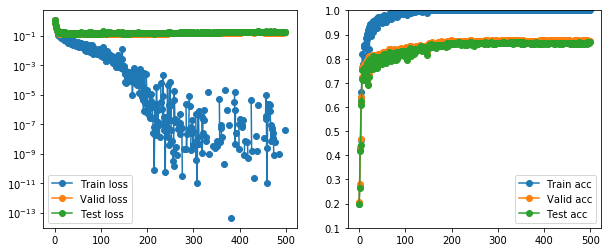

In [11]:
# Save data
losses_and_accs = np.concatenate(
    [np.asarray(losses_and_accs_train),
     np.asarray(losses_and_accs_valid),
     np.asarray(losses_and_accs_test)], axis=1)

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
ax1.semilogy(losses_and_accs[:,0], '-o', label='Train loss')
ax1.semilogy(losses_and_accs[:,2], '-o', label='Valid loss')
ax1.semilogy(losses_and_accs[:,4], '-o', label='Test loss')

ax2.plot(losses_and_accs[:,1], '-o', label='Train acc')
ax2.plot(losses_and_accs[:,3], '-o', label='Valid acc')
ax2.plot(losses_and_accs[:,5], '-o', label='Test acc')

for ax in [ax1,ax2]:
    ax.legend()

ax2.set_ylim(0.1,1)
    
print('Final results: ', losses_and_accs[-1])